# Project 2 (5 basic points when submitted in time. Minus 50% over total points after 12 hrs.)

- Local vscode에서 kernel error가 발생하는 경우, Google Colab에서 실행하기 바랍니다.
    * Colab - 런타임 - 런타임 유형 변경 - GPU
- Keras를 사용하여 cifar10 dataset을 분류할 수 있는 딥러닝 모델을 만듭니다.
- data: 50,000 32x32 color training images and 10,000 test images
- target: labeled over 10 categories

    |Label | Description|
    |---|---|
    |0|airplane|
    |1|automobile|
    |2|bird|
    |3|cat|
    |4|deer|
    |5|dog|
    |6|frog|
    |7|horse|
    |8|ship|
    |9|truck|

https://www.cs.toronto.edu/~kriz/cifar.html

# Requirements
- 아래 model figure를 참고하여, ***함수형 API를 사용해서*** DNN model과 CNN model을 각각 만들고 early stopping을 사용하여 학습하고 figuring합니다. (2)

    * Dropout prob = 0.5

    * DNN: https://raw.githubusercontent.com/crazytb/schadvmachinelearning/main/proj02-architecture-dnn.png

        ![](https://raw.githubusercontent.com/crazytb/schadvmachinelearning/main/proj02-architecture-dnn.png)

    * CNN: https://raw.githubusercontent.com/crazytb/schadvmachinelearning/main/proj02-architecture-cnn.png
    
        ![](https://raw.githubusercontent.com/crazytb/schadvmachinelearning/main/proj02-architecture-cnn.png)

- 3개의 conv layer에 대한 특성맵을 출력합니다. 아래는 출력예시입니다. (3)

    ![](https://raw.githubusercontent.com/crazytb/schadvmachinelearning/main/proj02-feature-map-1.png)

    ![](https://raw.githubusercontent.com/crazytb/schadvmachinelearning/main/proj02-feature-map-2.png)

    ![](https://raw.githubusercontent.com/crazytb/schadvmachinelearning/main/proj02-feature-map-3.png)

** DNN과 CNN 모두 모델을 형성한 뒤 .summary() 출력 필요**

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3) (40000, 1) (10000, 1) (10000, 1)
[6]


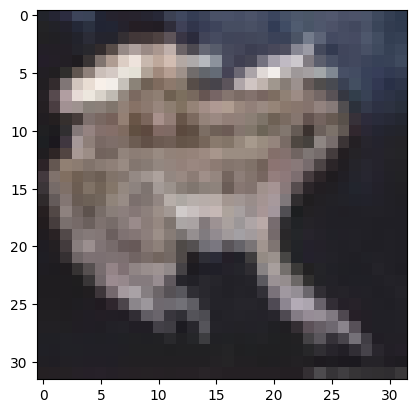

In [1]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split

# X -> input(scaled)
# y -> target

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

plt.imshow(x_train[0])
print(y_train[0])

### Make DNN model using functional API (model summary 출력 및 compile, fit 실행)

In [7]:
from keras.models import Model
from keras import layers

inputs = layers.Input(shape=(32,32,3))
rescaling = layers.Rescaling(1/255)(inputs)
flatten = layers.Flatten()(rescaling)
dense = layers.Dense(128, activation='relu')(flatten)
dense_1 = layers.Dense(128, activation='relu')(dense)
dense_2 = layers.Dense(128, activation='relu')(dense_1)
dropout = layers.Dropout(0.5)(dense_2)
outputs = layers.Dense(10, activation='softmax')(dropout)
DNN_model = Model(inputs = inputs, outputs = outputs)

# 컴파일
DNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 체크포인트, 얼리스타핑, fit
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = DNN_model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[checkpoint_cb, early_stopping_cb])
dnn_acc_plot = history.history['accuracy']
dnn_val_acc_plot = history.history['val_accuracy']
dnn_loss_plot = history.history['loss']
dnn_val_loss_plot = history.history['val_loss']

# 모델 평가
dnn_test_loss, dnn_test_acc = DNN_model.evaluate(x_test, y_test)
dnn_val_loss, dnn_val_acc = DNN_model.evaluate(x_val, y_val)
print(f"Test Loss: {dnn_test_loss}")
print(f"Test Accuracy: {dnn_test_acc}")
print(f"Validation Loss: {dnn_val_loss}")
print(f"Validation Accuracy: {dnn_val_acc}")

#모델 요약
DNN_model.summary()

Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9870 - accuracy: 0.2670 - val_loss: 1.8654 - val_accuracy: 0.3133
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8374 - accuracy: 0.3334 - val_loss: 1.7418 - val_accuracy: 0.3694
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7829 - accuracy: 0.3592 - val_loss: 1.7166 - val_accuracy: 0.3749
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7429 - accuracy: 0.3740 - val_loss: 1.6913 - val_accuracy: 0.3822
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7257 - accuracy: 0.3807 - val_loss: 1.6959 - val_accuracy: 0.3839
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7018 - accuracy: 0.3889 - val_loss: 1.6734 - val_accuracy: 0.3943
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6866 - accuracy: 0.3953 - val_loss: 1.6532 - val_accuracy:

### Make CNN model using functional API (model summary 출력 및 compile, fit 실행)

In [9]:
from keras.models import Model
from keras import layers

inputs = layers.Input(shape=(32,32,3))
rescaling = layers.Rescaling(1/255)(inputs)
conv = layers.Conv2D(32, kernel_size=3, activation='relu', padding='same')(rescaling)
maxpooling = layers.MaxPooling2D(2)(conv)
conv_1 = layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')(maxpooling)
maxpooling_1 = layers.MaxPooling2D(2)(conv_1)
conv_2 = layers.Conv2D(128, kernel_size=3, activation='relu', padding='same')(maxpooling_1)
maxpooling_2 = layers.MaxPooling2D(2)(conv_2)
flatten = layers.Flatten()(maxpooling_2)
dense = layers.Dense(128, activation='relu')(flatten)
dropout_1 = layers.Dropout(0.5)(dense)
outputs = layers.Dense(10, activation='softmax')(dropout_1)
CNN_model = Model(inputs = inputs, outputs = outputs)

# 컴파일
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 체크포인트, 얼리스타핑, fit
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = CNN_model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[checkpoint_cb, early_stopping_cb])
cnn_acc_plot = history.history['accuracy']
cnn_val_acc_plot = history.history['val_accuracy']
cnn_loss_plot = history.history['loss']
cnn_val_loss_plot = history.history['val_loss']

# 모델 평가
cnn_test_loss, cnn_test_acc = CNN_model.evaluate(x_test, y_test)
cnn_val_loss, cnn_val_acc = CNN_model.evaluate(x_val, y_val)
print(f"Test Loss: {cnn_test_loss}")
print(f"Test Accuracy: {cnn_test_acc}")
print(f"Validation Loss: {cnn_val_loss}")
print(f"Validation Accuracy: {cnn_val_acc}")

#모델 요약
CNN_model.summary()

Epoch 1/20
1250/1250 [==============================] - 28s 22ms/step - loss: 1.6554 - accuracy: 0.3912 - val_loss: 1.2611 - val_accuracy: 0.5431
Epoch 2/20
1250/1250 [==============================] - 27s 22ms/step - loss: 1.2710 - accuracy: 0.5486 - val_loss: 1.0947 - val_accuracy: 0.6172
Epoch 3/20
1250/1250 [==============================] - 28s 22ms/step - loss: 1.0853 - accuracy: 0.6181 - val_loss: 0.9234 - val_accuracy: 0.6809
Epoch 4/20
1250/1250 [==============================] - 27s 22ms/step - loss: 0.9738 - accuracy: 0.6607 - val_loss: 0.8640 - val_accuracy: 0.6983
Epoch 5/20
1250/1250 [==============================] - 27s 22ms/step - loss: 0.8785 - accuracy: 0.6935 - val_loss: 0.8513 - val_accuracy: 0.7073
Epoch 6/20
1250/1250 [==============================] - 27s 22ms/step - loss: 0.8055 - accuracy: 0.7204 - val_loss: 0.8258 - val_accuracy: 0.7190
Epoch 7/20
1250/1250 [==============================] - 27s 21ms/step - loss: 0.7513 - accuracy: 0.7402 - val_loss: 0.7918 -

### Plot loss and accuracy for DNN and CNN

Loss for DNN and CNN

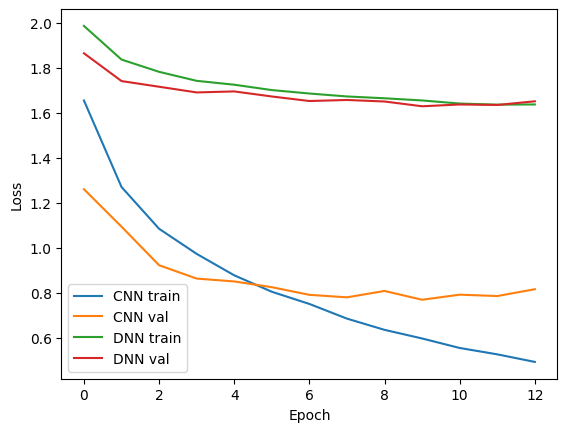

In [10]:
import matplotlib.pyplot as plt

plt.plot(cnn_loss_plot)
plt.plot(cnn_val_loss_plot)
plt.plot(dnn_loss_plot)
plt.plot(dnn_val_loss_plot)

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['CNN train', 'CNN val', 'DNN train', 'DNN val'])
plt.show()

Accuracy for DNN and CNN

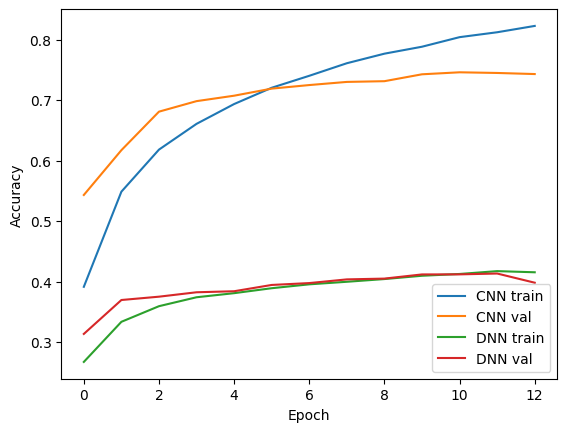

In [11]:
import matplotlib.pyplot as plt

plt.plot(cnn_acc_plot)
plt.plot(cnn_val_acc_plot)
plt.plot(dnn_acc_plot)
plt.plot(dnn_val_acc_plot)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['CNN train', 'CNN val', 'DNN train', 'DNN val'])
plt.show()

### Print feature maps

Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "model_55"
_________________________________________________________________
 Layer (type)                Output Shape 

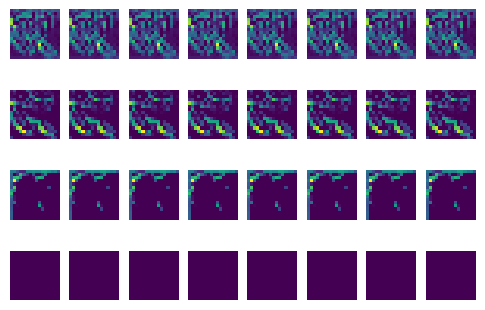

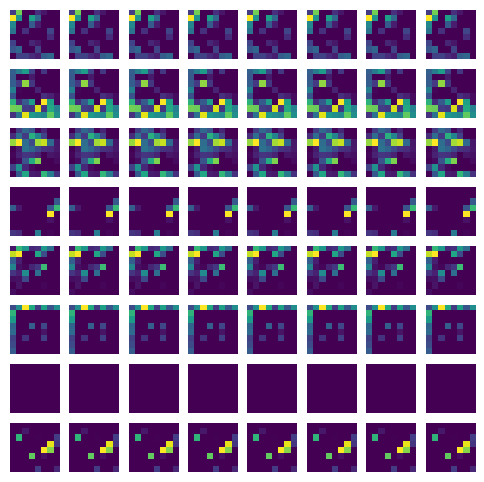

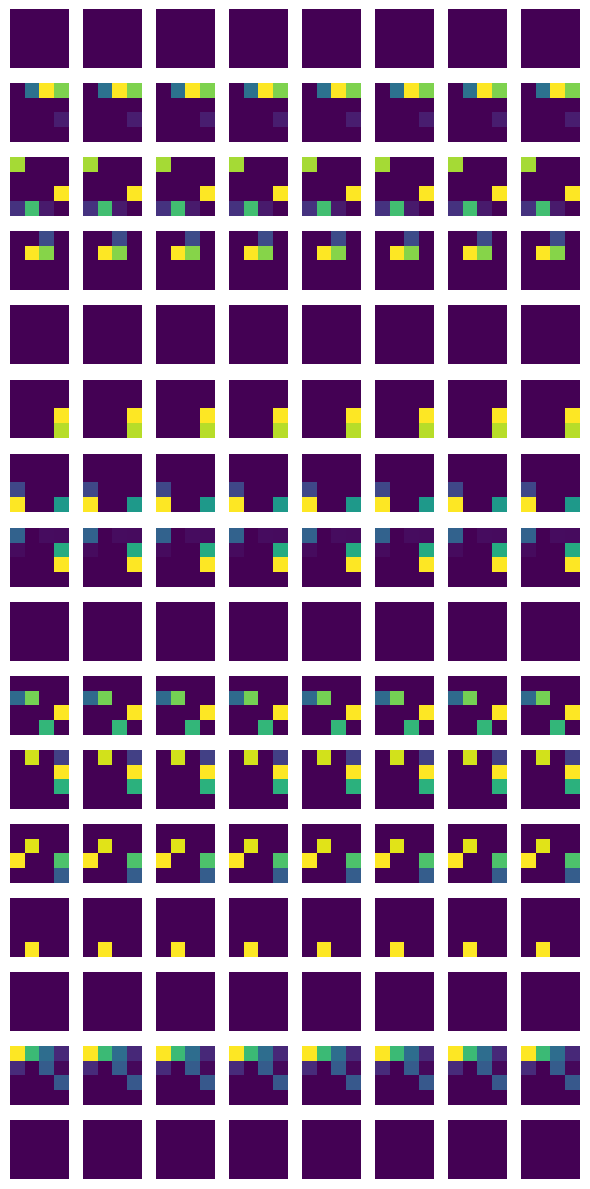

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 3개 층에 대한 모델 만들어주기
conv1_model = Model(inputs=CNN_model.input, outputs=CNN_model.layers[3].output)
conv1_model.summary()
conv2_model = Model(inputs=CNN_model.input, outputs=CNN_model.layers[5].output)
conv2_model.summary()
conv3_model = Model(inputs=CNN_model.input, outputs=CNN_model.layers[7].output)
conv3_model.summary()

# 이미지를 하나 넣어주자
image = x_train[0:1]
feature_map_1 = conv1_model.predict(image)
feature_map_2 = conv2_model.predict(image)
feature_map_3 = conv3_model.predict(image)

# conv1층
fig, axs = plt.subplots(4, 8, figsize=(6,4))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_map_1[0, :, :, i])
        axs[i, j].axis('off')

# conv2층
fig, axs = plt.subplots(8, 8, figsize=(6,6))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_map_2[0, :, :, i])
        axs[i, j].axis('off')

# conv3층
fig, axs = plt.subplots(16, 8, figsize=(6,12))
for i in range(16):
    for j in range(8):
        axs[i, j].imshow(feature_map_3[0, :, :, i])
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()
